In [158]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [159]:
dataset= pd.read_csv(r"C:\Users\csucsu\Desktop\Titanic\train.csv")

In [160]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
import seaborn as sns
male_ratio = len(dataset[dataset['Sex']=='male'])/len(dataset)
female_ratio = len(dataset[dataset['Sex']=='female'])/len(dataset)

In [162]:
female_df = dataset[dataset['Sex']=='female']
female_survival = female_df['Survived'].value_counts().to_dict()
male_df = dataset[dataset['Sex']=='male']
male_survival = male_df['Survived'].value_counts().to_dict()

#Normalized survival rates
total = sum(female_survival.values(), 0.0)
female_survival = {k: v / total for k, v in female_survival.items()}
total = sum(male_survival.values(), 0.0)
male_survival = {k: v / total for k, v in male_survival.items()}
survival_rates = [female_survival[1], male_survival[1]]

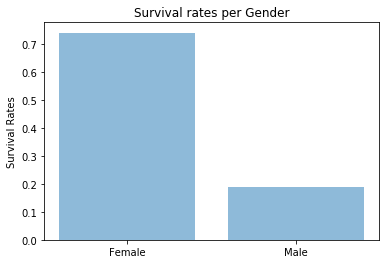

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('Female', 'Male')
y_pos = np.arange(len(objects))

plt.bar(y_pos, survival_rates, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Survival Rates')
plt.title('Survival rates per Gender')

plt.show()

In [164]:
survival_per_age = ['Survived', 'Age']
child = dataset[dataset['Age'] <= 15]
child_died = len(child[child['Survived'] == 0])
child_survived = len(child[child['Survived'] == 1])
adult = dataset[dataset['Age'] > 15]
adult_died = len(adult[adult['Survived'] == 0])
adult_survived = len(adult[adult['Survived'] == 1])

child_died = child_died / len(child)
child_survived = child_survived / len(child)
adult_died = adult_died / len(adult)
adult_survived = adult_survived / len(adult)

data = (child_died, child_survived, adult_died, adult_survived)
child_died

0.40963855421686746

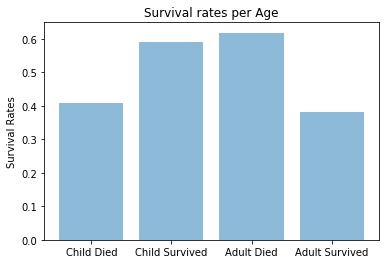

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('Child Died', 'Child Survived', 'Adult Died', 'Adult Survived')
y_pos = np.arange(len(objects))

plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Survival Rates')
plt.title('Survival rates per Age')

plt.show()

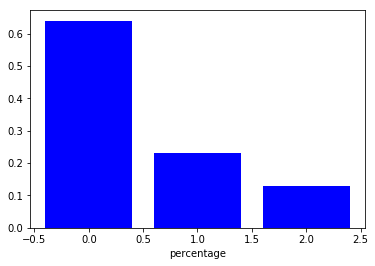

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline


y = [0.64, 0.23, 0.13]
N = len(y)
x = range(N)
plt.bar(x, y, color="blue")
plt.xlabel('percentage')
plt.show()

In [167]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [168]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)


# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


Number of null values in Age: 177


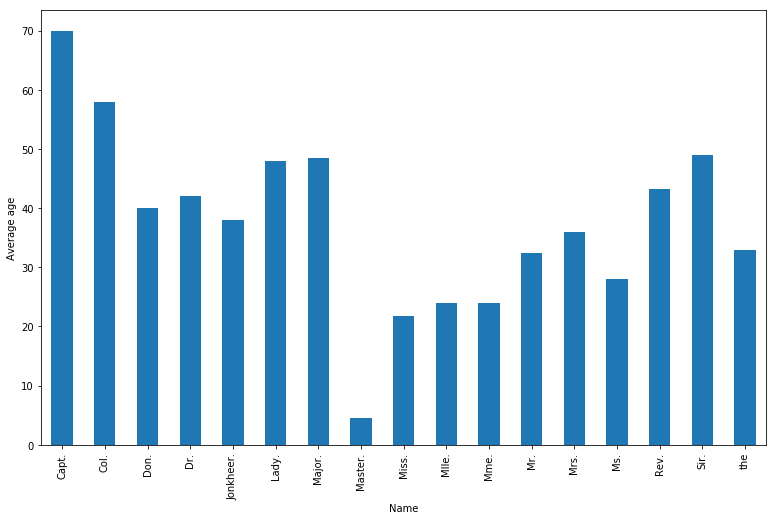

In [169]:
#-------------- Taking care of missing data  -----------------------------

print ('Number of null values in Age:', sum(X.Age.isnull()))
 

# -------- Change Name -> Title ----------------------------
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
# ---------------------------------------------------------- 


#------------------ Average Age per title -------------------------------------------------------------
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age
#------------------------------------------------------------------------------------------------------


#------------------ Fill the missing Ages ---------------------------
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)


In [170]:
title_mean_age

[['Rev.',
  'the',
  'Mr.',
  'Dr.',
  'Ms.',
  'Major.',
  'Jonkheer.',
  'Col.',
  'Miss.',
  'Lady.',
  'Capt.',
  'Don.',
  'Mrs.',
  'Mme.',
  'Mlle.',
  'Sir.',
  'Master.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]